In [21]:
import glob
from nilearn import plotting
import matplotlib.pyplot as plt
import nilearn
import numpy as np
import nibabel as nib
from nilearn.image import crop_img
import os
from skimage.transform import resize, downscale_local_mean
import tqdm

In [22]:
all_T1_files = glob.glob('./data_T1_T2_201909/' + '*T1*nii*')
all_T1_files = sorted(all_T1_files)

all_T2_files = glob.glob('./data_T1_T2_201909/' + '*T2*nii*')
all_T2_files = sorted(all_T2_files)

all_defusion_files = glob.glob('./data_DTI_tensor/' + '*[AD,FD,MA,RD].nii*')
all_defusion_files = sorted(all_defusion_files)

In [31]:
def crop_images(data,size):
    xmin = 0
    xmax = size
    ymin = 0
    ymax = size
    zmin = 0
    zmax = size
    data[np.isnan(data)] = 0
    for i in range(0,size,10):
        if sum(data[:, :, int(size/2)][i]) >0:
            xmin = i
            break
    for i in range(0,size,10):
        if sum(data[:, :, int(size/2)][size-i]) >0:
            xmax = size-i
            break

    for i in range(0,size,10):
        if sum(data[:, :, int(size/2)][:,i]) >0:
            ymin = i
            break
    for i in range(0,size,10):
        if sum(data[:, :, int(size/2)][:,size-i]) >0:
            ymax = size-i
            break     
    for i in range(0,size,10):
        if sum(sum(data[:, :, i])) >0:
            zmin = i
            break 
    for i in range(0,size,10):
        if sum(sum(data[:, :, size-i])) >0:
            zmax = size-i
            break 
    if xmin>=xmax:
        xmin = 0
        xmax = size
    if ymin>=ymax:
        ymin = 0
        ymax = size
    if zmin>=zmax:
        zmin = 0
        zmax = size       
    return xmin,xmax,ymin,ymax,zmin,zmax

In [32]:
import os

def getSize(filename):
    st = os.stat(filename)
    return round(st.st_size*1e-6)

In [25]:
def log_to_textfile(filename, text):
    """
    Function log_to_textfile
    
    Appends a text to a file (logs)
    
    Args:
        filename (str): Filename of logfile
        text (str): New information to log (append)
    
    Return:
    
    """
    print(text)
    f = open(filename, "a")
    f.write(text + '\n')
    f.close()

In [6]:
def crop_and_downsample(file_list, path_to_save, input_dim, output_dim, logfile):
  """
    Function to crop images and then downsample them to the supplied dimensions
    file_list : files to be processed
    path_to_save : directory where processed result is saved
    input_dim : dimensions of input image
    output_dim : pixels in downsampled output (Eg. output_dim = 64 implies o/p will be 64x64x64)
  """
  original_sizes = []
  processed_sizes = []
  counter = 0
  #create directory if it doesn't exist
  if not os.path.exists(path_to_save):
    os.makedirs(path_to_save)

  for file in file_list:
    log_to_textfile(logfile, file)
    if counter % 100 == 0:
      log_to_textfile(logfile, str(counter) + ' processed')
    if os.stat(file).st_size == 0:
      log_to_textfile(logfile, file + ' is empty')
    else:
      file_new_path = path_to_save + file.split('/')[-1]
      if not(os.path.exists(file_new_path)):
        try:
          org = nib.load(file)
          data = np.array(org.dataobj)
          if org.shape == (input_dim,input_dim,input_dim):
            xmin,xmax,ymin,ymax,zmin,zmax  = crop_images(data, input_dim-1)
            cropped = nilearn.image.new_img_like(org, data[xmin:xmax,ymin:ymax,zmin:zmax], affine=None, copy_header=False)
            cropped_data = np.array(cropped.dataobj)
            downsampled_cropped_data = resize(cropped_data, (output_dim, output_dim, output_dim),anti_aliasing=True)
            downsampled_cropped_image = nilearn.image.new_img_like(cropped, downsampled_cropped_data, affine=None, copy_header=False)
            nib.save(img=downsampled_cropped_image, filename=file_new_path)
            log_to_textfile(logfile, str(downsampled_cropped_image.shape))
          log_to_textfile(logfile, str(org.shape))
        except EOFError as error:
          log_to_textfile(logfile, str(error))
            
#Run for T1 and T2 files
path_to_save_T1 = "./data_T1_lowerres_cropped/"
path_to_save_T2 = "./data_T2_lowerres_cropped/"
path_to_save_defusion = "./data_def_lowerres_cropped/"

#print('\nProcessing T1 images :\n')
#crop_and_downsample(all_T1_files, path_to_save_T1, input_dim = 256, output_dim = 64, logfile='t1_cropped.log')
#print('\nProcessing T2 images :\n')
#crop_and_downsample(all_T2_files, path_to_save_T2, input_dim = 256, output_dim = 64, logfile='t2_cropped.log')
print('\nProcessing Defusion images :\n')
crop_and_downsample(all_defusion_files, path_to_save_defusion, input_dim = 190, output_dim = 64, logfile='tdef_cropped.log')


Processing Defusion images :

./data_DTI_tensor/sub-NDARINV003RTV85_DTI_tensor_mr_DTI_AD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV003RTV85_DTI_tensor_mr_DTI_FA.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV003RTV85_DTI_tensor_mr_DTI_MD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV003RTV85_DTI_tensor_mr_DTI_RD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV007W6H7B_DTI_tensor_mr_DTI_AD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV007W6H7B_DTI_tensor_mr_DTI_FA.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV007W6H7B_DTI_tensor_mr_DTI_MD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV007W6H7B_DTI_tensor_mr_DTI_RD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV00BD7VDC_DTI_tensor_mr_DTI_AD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV00BD7VDC_DTI_tensor_mr_DTI_FA.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV00BD7VDC_DTI_tensor_mr_DTI_MD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV00BD7VDC_DTI_tensor_mr_DTI_RD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV00CY

./data_DTI_tensor/sub-NDARINV0X4A2LKW_DTI_tensor_mr_DTI_RD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV0X59EG8X_DTI_tensor_mr_DTI_AD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV0X59EG8X_DTI_tensor_mr_DTI_FA.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV0X59EG8X_DTI_tensor_mr_DTI_MD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV0X59EG8X_DTI_tensor_mr_DTI_RD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV0XDBADBW_DTI_tensor_mr_DTI_AD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV0XDBADBW_DTI_tensor_mr_DTI_FA.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV0XDBADBW_DTI_tensor_mr_DTI_MD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV0XDBADBW_DTI_tensor_mr_DTI_RD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV0XFVW4LF_DTI_tensor_mr_DTI_AD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV0XFVW4LF_DTI_tensor_mr_DTI_FA.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV0XFVW4LF_DTI_tensor_mr_DTI_MD.nii.gz
0 processed
./data_DTI_tensor/sub-NDARINV0XFVW4LF_DTI_tensor_mr_DTI_RD.nii.g

UnboundLocalError: local variable 'xmin' referenced before assignment

In [ ]:
#Run for T1 and T2 files
path_to_save_T1 = "./data_T1_lowerres_cropped128/"
path_to_save_T2 = "./data_T2_lowerres_cropped128/"
path_to_save_defusion = "./data_def_lowerres_cropped128/"

print('\nProcessing T1 images :\n')
crop_and_downsample(all_T1_files, path_to_save_T1, input_dim = 256, output_dim = 128, logfile='t1_cropped128.log')
print('\nProcessing T2 images :\n')
crop_and_downsample(all_T2_files, path_to_save_T2, input_dim = 256, output_dim = 128, logfile='t2_cropped128.log')
print('\nProcessing Defusion images :\n')
crop_and_downsample(all_defusion_files, path_to_save_defusion, input_dim = 190, output_dim = 128, logfile='tdef_cropped128.log')

In [ ]:
error

In [26]:
file = './data_DTI_tensor/sub-NDARINVBKW33JVR_DTI_tensor_mr_DTI_RD.nii.gz'

In [33]:
org = nib.load(file)
data = np.array(org.dataobj)
xmin,xmax,ymin,ymax,zmin,zmax  = crop_images(data, 190-1)
          

In [34]:
xmin,xmax,ymin,ymax,zmin,zmax 

(0, 189, 0, 189, 30, 59)

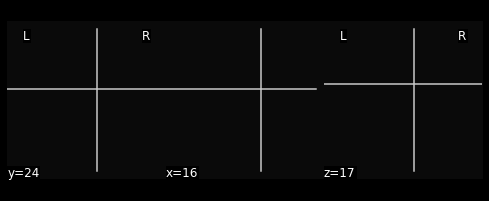

In [30]:
%matplotlib inline
plotting.plot_anat(org)
plotting.show()